In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('./test_score.ipynb'))))

In [2]:
import numpy as np
import pandas as pd

from ylearn.estimator_model._naive_forest import _GrfTree, NaiveGrf
from ylearn.estimator_model import CausalTree
from ylearn.exp_dataset.exp_data import sq_data
from ylearn.utils._common import to_df
from ylearn.estimator_model._naive_forest.utils import grad, grad_coef, inverse_grad

from numpy.linalg import lstsq, inv

In [3]:
from copy import deepcopy


n = 2000
d = 10     
n_x = 1
y, x, v = sq_data(n, d, n_x)

true_te = lambda X: np.hstack([X[:, [0]]**2 + 1, np.ones((X.shape[0], n_x - 1))])
w = deepcopy(v)
v_test = v[:min(100, n)].copy()
v_test[:, 0] = np.linspace(np.percentile(v[:, 0], 1), np.percentile(v[:, 0], 99), min(100, n))

In [4]:
data = to_df(treatment=x, outcome=y, v=v)
test_data = to_df(v=v_test)

outcome = 'outcome'
treatment = 'treatment'
adjustment = data.columns[2:]

In [5]:
from sklearn.preprocessing import OneHotEncoder
# oh = OneHotEncoder()
# x = oh.fit_transform(x).toarray()

In [6]:
gt = _GrfTree()
gt._fit_with_array(x=x, y=y.squeeze(), w=w, v=v, i=1)

building 2-th tree


In [7]:
grf = NaiveGrf(n_jobs=1, n_estimators=100)
grf.verbose = 1

In [8]:
grf.fit(
    data=data, outcome=outcome, treatment=treatment, adjustment=adjustment, covariate=adjustment
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building 1-th tree
building 2-th tree
building 3-th tree
building 4-th tree
building 5-th tree
building 6-th tree
building 7-th tree
building 8-th tree
building 9-th tree
building 10-th tree
building 11-th tree
building 12-th tree
building 13-th tree
building 14-th tree
building 15-th tree
building 16-th tree
building 17-th tree
building 18-th tree
building 19-th tree
building 20-th tree
building 21-th tree
building 22-th tree
building 23-th tree
building 24-th tree
building 25-th tree
building 26-th tree
building 27-th tree
building 28-th tree
building 29-th tree
building 30-th tree
building 31-th tree
building 32-th tree
building 33-th tree
building 34-th tree
building 35-th tree
building 36-th tree
building 37-th tree
building 38-th tree
building 39-th tree
building 40-th tree
building 41-th tree
building 42-th tree
building 43-th tree
building 44-th tree
building 45-th tree
building 46-th tree
building 47-th tree
building 48-th tree
building 49-th tree
building 50-th tree
building 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.6min finished


In [9]:
effect = grf._prepare4est(test_data)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished


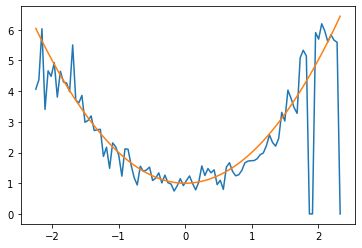

In [10]:
import matplotlib.pyplot as plt

true_te = lambda X: np.hstack([X[:, [0]]**2 + 1, np.ones((X.shape[0], n_x - 1))])

for t in range(n_x):
    plt.plot(v_test[:, 0], effect[:, t])
    plt.plot(v_test[:, 0], true_te(v_test)[:, t])
plt.show()